# Наследование

Механизм наследования позволяет нам создавать иерархию классов, а также использовать методы и атрибуты классов, лежащих выше в иерархии из их потомков

## Синтаксис

С синтаксисом наследований мы кратко ознакомились при работе с исключениями, выглядит это так

In [2]:
class MyBrandNewError(Exception):
    # Тело класса
    pass

В данном случае мы создаём новый класс и наследуем его от класса `Exception`, это значит, что все методы и свойства родительского класса (тот который в скобочках) будут также доступны его потомку. Именно поэтому наш новый класс и ведёт себя как исключение, так как ему были переданы все свойственнные для исключений особенности. И да, все исключения в питоне представлены классами.

Сравним два варианта

In [3]:
class MyBrandNewError:   # Просто создаём новый класс, не используем наследование
    pass

raise MyBrandNewError

TypeError: exceptions must derive from BaseException

In [4]:
class MyBrandNewError(Exception):   # Создаём новый класс-наследник Exception
    pass

raise MyBrandNewError

MyBrandNewError: 

В первом случае не происходит выбрасывания исключения `MyBrandNewError`, так как данный класс не обладает свойствами исключения и питон не понимает, что с ним делать, когда мы передаём его в инструкцию `raise`

Во втором случае наш класс **наследует** свойства исключений, а значит умеет работать с `raise`

## Логика работы наследования

Сделаем очень простой класс, который хранит в себе некоторую последовательность и имеет метод для печати этой последовательности

In [37]:
class Sequence:
    def __init__(self, seq):
        self.seq = seq
        
    def print_sequence(self):
        print(self.seq)

In [6]:
sequence = Sequence("ATGCGTAGCTAGCATC")
sequence.print_sequence()

ATGCGTAGCTAGCATC


Наследование позволяет сделать нам новый класс, который сохраняет всю функциональность родителя, но при этом позволяет нам добавлять туда новые методы и атрибуты, которых у родителя нет

Сперва рассмотрим простейший пример - просто сделаем наследника класса `Sequence` и не будем ничего добавлять

In [7]:
class NewSequence(Sequence):
    pass


sequence = NewSequence("ATGCGTAGCTAGCATC")
sequence.print_sequence()

ATGCGTAGCTAGCATC


Как видим, данный класс работает точно также как и его родитель, поскольку мы не привнесли ничего нового в этот класс.

Теперь попробуем добавить классу `MySequence` новый метод, которого нет в `Sequence`

In [8]:
class NewSequence(Sequence):
    def print_reversed_sequence(self):
        print(self.seq[::-1])


sequence = NewSequence("ATGCGTAGCTAGCATC")
sequence.print_sequence()
sequence.print_reversed_sequence()

ATGCGTAGCTAGCATC
CTACGATCGATGCGTA


Мы видим, что **оба метода** (новый и родительский) успешно работают, хотя в теле класса `NewSequence` мы вообще никак не упоминали метод `print_sequence`. Этим и полезно наследование, оно помогает избегать повторения кода

В дочерних классах также возможно перезаписывать методы родительского класса, перезаписанные методы будут иметь приоритет над родительскими

In [9]:
class NewSequence(Sequence):
    def print_sequence(self):   # Мы перезаписали метод с таким же именем из родительского класса
        print(f"This is my sequence {self.seq}!!!!")
        
    def print_reversed_sequence(self):
        print(self.seq[::-1])


sequence = NewSequence("ATGCGTAGCTAGCATC")
sequence.print_sequence()   # Здесь происходит вызов именно новой вариации метода, а не родительской, так как мы перезаписали его
sequence.print_reversed_sequence()

This is my sequence ATGCGTAGCTAGCATC!!!!
CTACGATCGATGCGTA


### Функция `super`

При перезаписывании методов родителя мы не теряем их полностью, а можем обратиться к ним при помощи функции `super`

In [10]:
class NewSequence(Sequence):
    def print_sequence(self):   # Мы перезаписали метод с таким же именем из родительского класса
        print("This is my sequence", end=" ")
        super().print_sequence()   # Функция super позволяет нам обратиться к "экземпляру родительского класса"
        
    def print_reversed_sequence(self):
        print(self.seq[::-1])


sequence = NewSequence("ATGCGTAGCTAGCATC")
sequence.print_sequence()
sequence.print_reversed_sequence()

This is my sequence ATGCGTAGCTAGCATC
CTACGATCGATGCGTA


У `super` есть два основных способа применения:
1. Внутри класса можно использовать просто `super()` без аргументов. В таком случае эта функция вернёт нам специальный объект, через который можно взаимодействовать с родительским классом. Это не совсем верно, но можно думать об этом, как о том, что `super()` возвращает нам `self` родителя
2. Использовать `super` вне тела класса в 99.9999% случаев не нужно, но это при желании можно сделать следующим образом, передав в эту функцию тип объекта и сам объект

In [11]:
super(NewSequence, sequence).print_sequence()  # Полностью аналогично вызову super().print_sequence() внутри тела класса

ATGCGTAGCTAGCATC


### Наследуются ли атрибуты (которые **не методы**)?

**Да**, в примере выше мы видим, что мы можем использовать атрибут `seq` в дочернем классе. При наследовании как в примере выше, дочерний класс принимает ВСЕ методы родительского, в т.ч. `__init__`, поэтому в объекте дочернего класса при исполнении кода `NewSequence("ATGCGTAGCTAGCATC")` также будет создан атрибут `seq` в унаследованном от `Sequence` методе `__init__`

### А как добавить дочернему классу новые атрибуты?

Давайте сразу рассмотрим более сложный пример. Напишем класс `NucleicAcidSequence`, который помимо методов и атрибутов из `Sequence` будет иметь дополнительный атрибут `sequence_type` и метод `complement`

In [12]:
class NucleicAcidSequence(Sequence):
    def __init__(self, seq, sequence_type="DNA"):
        self.sequence_type = sequence_type
        
    def complement(self, inplace=False):
        complement_seq = self.seq.translate(str.maketrans("ATGCU", "TACGA"))
        if inplace:
            self.seq = complement_seq
        return complement_seq
    
sequence = NucleicAcidSequence("ATGCTA")
sequence.print_sequence()

AttributeError: 'NucleicAcidSequence' object has no attribute 'seq'

В данном коде мы добавили к нашему классу новый атрибут `sequence_type`, но для его добавления нам пришлось перезаписать метод `__init__` родительского класса, так как в нём не было ничего связанного с `sequence_type`, а атрибуты по-хорошему надо задавать именно в конструкторе. Но в итоге наш код (вызов метода родительского класса `print_sequence`) не работает.

Это происходит из-за того, что мы перезаписали унаследованный конструктор родительского класса, который выглядел вот так
```python
    def __init__(self, seq):
        self.seq = seq
```

Т.е. при создании объекта класса `NucleicAcidSequence` не происходит создания ключевого атрибута `seq`, а значит все методы, которые используют `seq` автоматически перестанут работать.

Данную проблему можно решить двумя способами: хорошим и плохим

#### Плохой способ

Для решения проблемы можно просто создать атрибут `seq` в переписанном нами конструкторе следующим образом

In [3]:
str.maketrans("ATGCU", "TACGA")

{65: 84, 84: 65, 71: 67, 67: 71, 85: 65}

In [13]:
class NucleicAcidSequence(Sequence):
    def __init__(self, seq, sequence_type="DNA"):
        self.seq = seq     # <<<<<<<<<<<
        self.sequence_type = sequence_type
        
    def complement(self, inplace=False):
        complement_seq = self.seq.translate()
        if inplace:
            self.seq = complement_seq
        return complement_seq
    
sequence = NucleicAcidSequence("ATGCTA")
sequence.print_sequence()

ATGCTA


Поскольку мы возвращаем в класс атрибут `seq`, всё теперь работает. Но мы можем заметить, что данное решение выглядит не очень изящно. Допустим, что в методе `__init__` родительского класса у нас создавался бы не один атрибут `seq`, а, скажем, 15 различных атрибутов. Было бы не очень удобно просто копировать код их создания в конструктор дочернего класса, повторы кода это плохо

#### Хороший способ

Давайте всё-таки представим, что в конструкторе родительского класса у нас создаётся 15 атрибутов

In [8]:
class Sequence:
    def __init__(self, seq):
        self.seq = seq
        self.attr1 = 1
        self.attr2 = 2
        self.attr3 = 3
        self.attr4 = 4
        self.attr5 = 5
        self.attr6 = 6
        self.attr7 = 7
        self.attr8 = 8
        self.attr9 = 9
        self.attr10 = 10
        self.attr11 = 11
        self.attr12 = 12
        self.attr13 = 13
        self.attr14 = 14
        
    def print_sequence(self):
        print(self.seq)

C использованием плохого способа из предыдущего шага, дочерний класс выглядел бы вот так

In [9]:
class NucleicAcidSequence(Sequence):
    def __init__(self, seq, sequence_type="DNA"):
        self.seq = seq
        self.attr1 = 1
        self.attr2 = 2
        self.attr3 = 3
        self.attr4 = 4
        self.attr5 = 5
        self.attr6 = 6
        self.attr7 = 7
        self.attr8 = 8
        self.attr9 = 9
        self.attr10 = 10
        self.attr11 = 11
        self.attr12 = 12
        self.attr13 = 13
        self.attr14 = 14
        self.sequence_type = sequence_type
        
    def complement(self, inplace=False):
        complement_seq = self.seq.translate(str.maketrans("ATGCU", "TACGA"))
        if inplace:
            self.seq = complement_seq
        return complement_seq

Мы чётко видим, что код из родительского и дочернего класса тупо повторяется. В таком случае, почему бы нам просто не вызвать конструктор родительского класса внутри конструктора дочернего, в результате этого будет выполнен тот же самый код, что и в примере выше

In [10]:
class NucleicAcidSequence(Sequence):
    def __init__(self, seq, sequence_type="DNA"):
        super().__init__(seq)       # Здесь мы вызываем конструктор родительского класса, в результате чего наш объект получит те самые 15 атрибутов из конструктора родительского класса
        self.sequence_type = sequence_type
        
    def complement(self, inplace=False):
        complement_seq = self.seq.translate(str.maketrans("ATGCU", "TACGA"))
        if inplace:
            self.seq = complement_seq
        return complement_seq
    
sequence = NucleicAcidSequence("ATGC")
sequence.print_sequence()
sequence.attr7

ATGC


7

При наследовании в большинстве случаев вам нужно будет делать именно так, поэтому не забывайте сначала вызвать конструктор родительского класса, а потом уже создавать атрибуты для дочернего

## Множественное наследование

Всё, что вам пока нужно знать о множественном наследовании - **оно существует**. Синтаксис выглядит следующим образом
```python
class NewClass(ParentClass1, ParentClass2, ParentClass3):
    # Тело класса
    pass
```
Оно работает точно так как вы ожидаете, пытаясь передать дочернему классу атрибуты от всех родителей. При этом там имеются свои нюансы при одинаковых именах атрибутов у родителей, поиске атрибутов и т.д.

Используется довольно редко, поэтому просто достаточно помнить, что оно есть/

Ниже приведён тупой пример, просто для представления

In [35]:
class Bee:
    def voice(self):
        print("Bzzzzz")

class Swarm(Bee, list):
    def voice(self):
        for bee in self:
            super().voice()

In [40]:
swarm = Swarm()
swarm.append(1)
swarm.append(2)
swarm.append(3)
swarm.append(4)
swarm.append(5)
swarm.pop();

In [41]:
swarm.voice()

Bzzzzz
Bzzzzz
Bzzzzz
Bzzzzz


## Функции `isinstance` и `issubclass`

### Функция `isinstance`

Данная функция позволяет нам узнать является ли **объект** экземпляром определённого класса, с учётом его родителей

In [40]:
class NucleicAcidSequence(Sequence):
    pass
    
sequence = NucleicAcidSequence("ATGC")

# Первым аргументом является проверяемый объект, а вторым класс
print(isinstance(sequence, int))    # Объект sequence НЕ является экземпляром класса int
print(isinstance(sequence, NucleicAcidSequence))    # Объект sequence ЯВЛЯЕТСЯ экземпляром класса NucleicAcidSequence
print(isinstance(sequence, Sequence))    # Объект sequence ЯВЛЯЕТСЯ экземпляром класса Sequence, так как класс данного объекта был унаследован от Sequence

False
True
True


### Функция `issubclass`

Данная функция работает точно также как и `isinstance`, но первым аргументом принимает класс. Т.е. мы проверяем является ли один класс наследником другого

In [42]:
class NucleicAcidSequence(Sequence):
    pass
    
sequence = NucleicAcidSequence("ATGC")

# Первым аргументом является проверяемый класс
print(issubclass(NucleicAcidSequence, int))    # Класс NucleicAcidSequence НЕ является наследником класса int
print(issubclass(NucleicAcidSequence, NucleicAcidSequence))    # Класс NucleicAcidSequence формально является подклассом самого себя, поэтому функция возвращает True
print(issubclass(NucleicAcidSequence, Sequence))    # Класс NucleicAcidSequence ЯВЛЯЕТСЯ наследником класса Sequence

False
True
True


## Примеры

### Наследование от `str`

Посмотрим подробнее как работает наследование на примере наследования от встроенного класса `str`

In [16]:
class Sequence(str):
    pass

Так как мы унаследовали наш класс от `str`, он будет обладать всеми методами `str`

In [17]:
seq1 = Sequence("ATGC")
seq2 = Sequence("CGTA")

In [18]:
seq1 + seq2

'ATGCCGTA'

In [19]:
seq1 * 2

'ATGCATGC'

In [20]:
"".join([seq1, seq2])

'ATGCCGTA'

In [22]:
seq1.lower()

'atgc'

In [23]:
seq2.strip("A")

'CGT'

In [26]:
type(seq1), type(seq2)

(__main__.Sequence, __main__.Sequence)

Как мы видим, наши объекты `sequence` работают точно также как и строки, но при этом имеют свой тип

Давайте добавим нашему классу метод `random_case`, который будет случайно делать символы в строке большими или маленькими

In [43]:
import random


class Sequence(str):
    def random_case(self):
        # self - это ссылка на текущий объект, поскольку мы унаследовались от str, то с ним можно обращаться как со строкой
        new_str = "".join([random.choice([str.lower, str.upper])(char) for char in self])
        return Sequence(new_str)   # Будет логично, если подобный метод будет возвращать тот же тип
    
sequence = Sequence("ATGCAGTC")
sequence.random_case()

'aTgcaGtC'

В примере выше мы возвращаем из метода объект типа `Sequence`, но мы указали это явно, с другими методами это работать не будет и это не круто

In [44]:
type(sequence.lower())  # А хотелось бы увидеть Sequence(

str

### Наследование нескольких классов от одного

Этот шаблон используется наиболее часто. Он пригодится вам, когда вы имеете несколько сущностей, которые очень сильно похожи, но отличаются в некоторых деталях. В таком случае весь код, который обеспечивает "похожесть" можно вынести в отдельный родительский класс и унаследовать от него несколько других, внеся в них лишь небольшие изменения

Для примера попробуем расширить историю с классом Sequence для биологических последовательностей/

Для начала напишем три простеньких класса для нуклеотидных, аминокислотных и углеводных последовательностей

In [50]:
from collections import Counter


class NucleicAcidSequence:
    def __init__(self, seq):
        self.seq = seq
        
    def content(self):
        return Counter(self.seq)
    
    def print_sequence(self):
        print(self.seq)
        
    def complement(self):
        complement_seq = self.seq.translate(str.maketrans("ATGCU", "TACGA"))
        return NucleicAcidSequence(complement_seq)

class AminoAcidSequence:
    def __init__(self, seq):
        self.seq = seq
        
    def content(self):
        return Counter(self.seq)
    
    def print_sequence(self):
        print(self.seq)
        
    def pi(self):
        # Мысленно представьте здесь код, который считает изоэлектрическую точку белка
        pass

class CarbohydrateSequence:
    def __init__(self, seq):
        self.seq = seq
        
    def content(self):
        return Counter(self.seq)
    
    def print_sequence(self):
        print(self.seq)
        
    def is_branching(self):
        # Мысленно представьте здесь код, который определяет, является ли полисахарид разветвлённым
        pass

Как мы видим, хоть формально данные классы и представляют разные сущности, у них очень много общего, в частности, все они имеют атрибут `seq` и одинаковые методы `content` и `print_sequence`. Эти повторяющиеся куски кода можно выделить в отдельный класс и унаследовать наши классы от него, оставив внутри них только уникальные функции.

In [51]:
from collections import Counter


class Sequence:
    def __init__(self, seq):
        self.seq = seq
        
    def content(self):
        return Counter(self.seq)
    
    def print_sequence(self):
        print(self.seq)


class NucleicAcidSequence(Sequence):    
    def complement(self):
        complement_seq = self.seq.translate(str.maketrans("ATGCU", "TACGA"))
        return NucleicAcidSequence(complement_seq)

class AminoAcidSequence(Sequence): 
    def pi(self):
        # Мысленно представьте здесь код, который считает изоэлектрическую точку белка
        pass

class CarbohydrateSequence(Sequence):
    def is_branching(self):
        # Мысленно представьте здесь код, который определяет, является ли полисахарид разветвлённым
        pass

Код стал намного чище и более читаемым, так как мы избавились от повторов. К тому же, если мы вдруг захотим добавить какой-то новый функционал для всех классов, нам нужно будет добавить его только в `Sequence` и он автоматически станет доступен его наследникам. Наследование это круто!

In [54]:
from collections import Counter


class Sequence:
    def __init__(self, seq):
        self.seq = seq
        
    def content(self):
        return Counter(self.seq)
    
    def print_sequence(self):
        print(self.seq)
        
    def reverse(self):
        return type(self)(self.seq[::-1])   # Попробуйте разобраться, почему мы делаем именно так


class NucleicAcidSequence(Sequence):    
    def complement(self):
        complement_seq = self.seq.translate(str.maketrans("ATGCU", "TACGA"))
        return NucleicAcidSequence(complement_seq)

class AminoAcidSequence(Sequence): 
    def pi(self):
        # Мысленно представьте здесь код, который считает изоэлектрическую точку белка
        pass

class CarbohydrateSequence(Sequence):
    def is_branching(self):
        # Мысленно представьте здесь код, который определяет, является ли полисахарид разветвлённым
        pass
    
    
na_sequence = NucleicAcidSequence("ATGC")
print(na_sequence.reverse().seq)

aa_sequence = AminoAcidSequence("ACDE")
print(aa_sequence.reverse().seq)

CGTA
EDCA


Вуаля, мы добавили код в `Sequence`, но можем использовать его с любым из классов

# Полезные функции при работе с ООП

## Функция `dir`

Функция `dir` это наше всё. При передаче ей любого объекта она возвращает полный список его атрибутов

In [43]:
dir("ATGC")

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


> Круто конечно, но где это вообще может пригодиться?

Хороший вопрос! Многие непопулярные библиотеки, а также редко используемые модули в популярных библиотеках зачастую имеют очень скудную документацию в которой просто может не быть сказано про те или иные атрибуты объекта. Также эта информация может быть в документации, но её бывает очень трудно найти из-за сложной иерархии библиотеки, неудобной организации документации и ещё кучи других проблем, которые могут помешать вам найти документацию для неизвестного объекта, который появился в вашем коде.

В таких случаях очень хорошим и действенным способом бывает передать интересующий вас объект в функцию `dir` и посмотреть на его набор атрибутов. Зачастую разработчики дают атрибутам адекватный нейминг, поэтому по их названиям можно приблизительно понять, что они делают. Кроме этого, результат функции `dir` также включает в себя приватные атрибуты (о них мы поговорим позже), которые зачастую вообще не включают в документацию, но они могут быть полезны в определённых ситуациях

Для примера возьмём пакет `biopython`, имеющий очень плохо организованную документацию. Рассмотрим только модуль `Seq` - https://biopython.org/docs/latest/api/Bio.Seq.html#Bio.Seq.Seq и допустим, что у нас в коде есть объект типа `Seq` и мы хотим узнать, что он может

In [60]:
from Bio.Seq import Seq


sequence = Seq("ATGC")

В приведённой документации так или иначе есть информация о методах `Seq`, но они раскиданы по разным классам и искать там информацию крайне не удобно, особенно, если ты не знаешь, что именно тебе нужно искать.

Но у нас есть способ куда проще, мы можем просто посмотреть на результат функции `dir`

In [61]:
dir(sequence)

['__abstractmethods__',
 '__add__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_data',
 'back_transcribe',
 'complement',
 'complement_rna',
 'count',
 'count_overlap',
 'encode',
 'endswith',
 'find',
 'index',
 'join',
 'lower',
 'lstrip',
 'replace',
 'reverse_complement',
 'reverse_complement_rna',
 'rfind',
 'rindex',
 'rsplit',
 'rstrip',
 'split',
 'startswith',
 'strip',
 'tomutable',
 'transcribe',
 'translate',
 'ungap',
 'upper']

Пока что нас интересуют только атрибуты без `_` в начале. Как мы видим, здесь всё собрано в одном месте и только для интересующего нас класса и нейминг довольно self explanatory. При этом вы всегда сможете попробовать выполнить какие-то методы, особенное, если работаете в ноутбуке.

Альтернативой `dir` также является автодополнение в IDE, но они имеют один минус - зачастую не показывают приватные атрибуты (начинающиеся с `_`), `dir` же даёт нам полный список

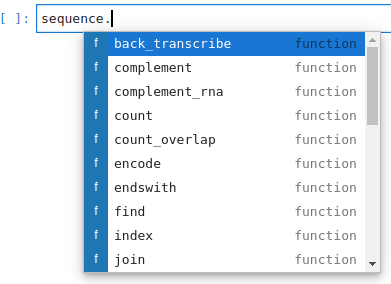

Приватные же атрибуты позволяют нам залезть в самые кишки объекта, иногда позволяя получать информацию, для которой разработчики не предоставили отдельный функционал.

Например, покопавшись в приватных атрибутах объекта `Seq` можно выяснить, что где-то внутри него последовательность представлена байтовой строкой.

In [65]:
sequence._data, type(sequence._data)

(b'ATGC', bytes)

## Функции ***attr

Данные функции позволяют взаимодействовать с атрибутами объектов. Они используются не очень часто, но в некоторых ситуациях незаменимы или просто сильно облегчают работу

### Функция `hasattr`

Позволяет нам проверить, имеет ли объект тот или иной атрибут. Это бывает нужно, чтобы избежать ошибок `AttributeError`

Например, методы строк `removeprefix` и `removesuffix` были добавлены только в версии Python 3.9 и следующий код **на младших версиях выбросил бы ошибку** `AttributeError`, так как данных методов тогда ещё не было

In [68]:
obj = "Some string"
obj.removesuffix("string")

'Some '

`hasattr` позволяет нам проверить наличие аттрибута у объекта без необходимости писать блок try-except AttributeError

In [69]:
obj = "Some string"
if hasattr(obj, "removesuffix"):   # Первый аргумент - объект, второй - строка с именем атрибута
    print(obj.removesuffix("string"))
else:
    print("Method is not available")

Some 


Данный случай очень притянут за уши. Когда у вас появится ситуация, где нужно это использовать вы сразу поймёте, но это бывает нечасто.

### Функция `getattr`

Позволяет нам получить значение атрибута из объекта или вернуть значение по-умолчанию (аналогично методу `get` словаря). `getattr(obj, attr_name)` эквивалентно `obj.attr_name`

In [78]:
obj = "Some string"

getattr(obj, "lower")   # Первый аргумент - объект, второй аргумент - имя атрибута, который мы хотим получить в виде строки

<function str.lower()>

In [79]:
getattr(obj, "replace")   # Первый аргумент - объект, второй аргумент - имя атрибута, который мы хотим получить в виде строки

<function str.replace(old, new, count=-1, /)>

In [82]:
getattr(obj, "some method that not exists")   # Пытаемся получить несуществующий атрибут БЕЗ указания значения по-умолчанию

AttributeError: 'str' object has no attribute 'some method that not exists'

In [83]:
getattr(obj, "some method that not exists", "default value")   # Пытаемся получить несуществующий атрибут C указанием значения по-умолчанию

'default value'

### Функция `setattr`

Позволяет задать значение для атрибута. `setattr(obj, attr_name, value)` эквивалентно `obj.attr_name = value`

In [87]:
class Sequence:
    def __init__(self, seq):
        self.seq = seq

obj = Sequence("ATGC")

setattr(obj, "new_attribute", 1)   # Первый аргумент - объект, второй - имя атрибута, третий - новое значение для атрибута
setattr(obj, "seq", "AAAAAAAAAAAAAAA")

In [88]:
obj.new_attribute, obj.seq

(1, 'AAAAAAAAAAAAAAA')

### Функция `delattr`

Позволяет удалить атрибут. `delattr(obj, attr_name)` эквивалентно `del obj.attr_name`

In [90]:
class Sequence:
    def __init__(self, seq):
        self.seq = seq

obj = Sequence("ATGC")

setattr(obj, "new_attribute", 1)
setattr(obj, "seq", "AAAAAAAAAAAAAAA")

delattr(obj, "seq")      # Первый аргумент - объект, второй - имя атрибута

In [92]:
print(obj.new_attribute)
print(obj.seq)

1


AttributeError: 'Sequence' object has no attribute 'seq'

# Что ещё следует знать (наверное)?

## Принципы SOLID

По сути это рекомендации по работе с ООП (как PEP8 - рекомендация по стилю кода). В лекции мы это не рассматриваем, так как рассказывать про это слишком душно, тем не менее знать это крайне полезно.

Если при написании ООП кода руководствоваться здравым смыслом и желанием, чтобы ваш код был поддерживаемым и читаемым, то тогда вы автоматически прийдёте к этим правилам, даже ни разу не прочитав их. Прочитать/посмотреть видео можно в интернете, материалов предостаточно. Найдите то, что подходит вашему уровню

## Порядок разрешения методов (MRO)

Ещё одна душная штука, которая частично интуитивно понятна. Это правила поиска атрибутов при наследовании, если с этим возникнут проблемы, то вы будете знать, что гуглить, но скорее всего вам это не понадобится

Рандомная ссылка по теме из интернета - https://tirinox.ru/mro-python/

## Любые объекты в питоне унаследованы от класса `object`

Т.е. код в двух ячейках ниже абсолютно эквивалентен. В питоне 2 нужно было обязательно наследовать классы от `object`, сейчас так делать не стоит

In [57]:
class Sequence(object):
    pass

In [58]:
class Sequence:
    pass

## Composition over inheritance

Для некоторых задач бывает удобнее использовать **композицию** вместо наследования. Сейчас эта практика сильно форсится в интернетах, но вы пользуйтесь тем, что вам больше нравится. Подробнее можно прочитать в интернете